<a href="https://colab.research.google.com/github/NganTran-0017/HIDS/blob/main/Final_Version_HIDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

!rm *.txt
! rm *.int

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, roc_curve, auc, recall_score, precision_score,plot_confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline

import nltk
nltk.download("popular")

## Tokenizing syscall sequences into n-grams of 6

from nltk.tokenize import word_tokenize
from nltk import ngrams

#**Processing data**

Use the given datasets in our GitHub to load the data

In [2]:
  ## Uncomment each line to load Normal data

# Synthetic sendmail csv_file = ['bounce-1.int', 'bounce.int', 'bounce-2.int', 'plus.int', 'queue.int', 'sendmail.daemon.int', 'sendmail.log.int']; DATA = 'Synthetic Sendmail'; DATA_I='Synthetic_Sendmail'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/1.Synthetic%20Sendmail/normal-data/bounce-1.int'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/1.Synthetic%20Sendmail/normal-data/bounce.int'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/1.Synthetic%20Sendmail/normal-data/bounce-2.int'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/1.Synthetic%20Sendmail/normal-data/plus.int'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/1.Synthetic%20Sendmail/normal-data/queue.int'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/1.Synthetic%20Sendmail/normal-data/sendmail.daemon.int'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/1.Synthetic%20Sendmail/normal-data/sendmail.log.int'

# LIVE LPR csv_file = ['lpr-normal-10.txt', 'lpr-normal-11.txt']; DATA = 'Live Lpr'; DATA_I='Live-Lpr' 
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/4.%20Live%20lpr/Normal/real/lpr-normal-11.txt'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/4.%20Live%20lpr/Normal/real/lpr-normal-10.txt'

# MIT live lpr csv_file = [ 'mit-lpr-mar.txt']; DATA = 'MIT Live Lpr'; DATA_I='MIT-Lpr' 
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/MIT/mit-lpr-mar.txt'

# LOGIN and PS csv_file = [ 'login-normal.txt', 'ps-normal.txt']; DATA = 'Login and Ps'; DATA_I ="Login-and-Ps"
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/7.Login_and_ps/normal/login-normal.txt'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/7.Login_and_ps/normal/ps-normal.txt'

# INETD 
csv_file = [ 'inetd-live-unm.int']; DATA = 'Inetd';DATA_I ="Inetd" 
!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/8.Inetd/inetd-live-unm.int'

# STIDE csv_file = [ 'stide-normal-500k.txt']; DATA = 'Stide';DATA_I ='Stide' 
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/10.Stide/stide-normal-500k.txt'

# Live Named  ==> Best result csv_file = [ 'normal-named-live-2k.txt']; DATA = 'Live Named';DATA_I ='Live-Named' 
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/6.Live_named/normal-named-live-2k.txt'

# Xlock csv_file = [ 'normal-xlock.txt']; DATA = 'Xlock';DATA_I='Xlock' 
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/5.xlock/normal-xlock.txt'

# Synthetic Ftp csv_file = [ 'nonself1.int','nonself2.int']; DATA = 'Synthetic Ftp'; DATA_I='Synthetic-Ftp'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/2.Synthetic%20Ftp/nonself1.int'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/2.Synthetic%20Ftp/nonself2.int'

# Synthetic lpr csv_file = ['syn.int']; DATA = 'Synthetic Lpr';DATA_I='Synthetic-Lpr'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/3.Synthetic-lpr/syn.int'

# Concat a list of files into normal df
list_of_dataframes = []
for filename in csv_file:
    list_of_dataframes.append(pd.read_csv(filename, sep=' ', header=None, engine='python'))
df = pd.concat(list_of_dataframes)

# Check number of columns, if > 2, then drop the excess
if len(df.columns) > 2:
    df=df.drop(labels=None, axis=1, columns = [2,3])
df =df.rename(columns= {0:"PID", 1:"Syscall"})

print('Normal data size:', df.shape)


  ## Uncomment each line to load Intrusion data:

# Synthetic sendmail csv_file = ['sm-10763.int', 'fwd-loops-1.int', 'fwd-loops-2.int', 'fwd-loops-3.int', 'fwd-loops-4.int', 'fwd-loops-5.int','sm-280.int', 'sm-314.int','sm-10801.int', 'sm-10814.int']
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/1.Synthetic%20Sendmail/Intrusion-trace-data/fwd-loops-1.int'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/1.Synthetic%20Sendmail/Intrusion-trace-data/fwd-loops-2.int'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/1.Synthetic%20Sendmail/Intrusion-trace-data/fwd-loops-3.int'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/1.Synthetic%20Sendmail/Intrusion-trace-data/fwd-loops-4.int'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/1.Synthetic%20Sendmail/Intrusion-trace-data/fwd-loops-5.int'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/1.Synthetic%20Sendmail/Intrusion-trace-data/sm-10763.int'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/1.Synthetic%20Sendmail/Intrusion-trace-data/sm-280.int'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/1.Synthetic%20Sendmail/Intrusion-trace-data/sm-314.int'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/1.Synthetic%20Sendmail/Intrusion-trace-data/sm-10801.int'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/1.Synthetic%20Sendmail/Intrusion-trace-data/sm-10814.int'

# LIVE LPR csv_file =['exploit-unm.int'] 
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/4.%20Live%20lpr/Intrusion/exploit-unm.int'

# MIT live lpr csv_file = [ 'exploit-ai.int'] 
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/MIT/exploit-ai.int'

# LOGIN and PS csv_file = [ 'login-homegrown.int','ps-homegrown.int','login-recovered.int','ps-recovered.int']
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/7.Login_and_ps/intrusion/ps-recovered.int'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/7.Login_and_ps/intrusion/ps-homegrown.int'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/7.Login_and_ps/intrusion/login-recovered.int'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/7.Login_and_ps/intrusion/login-homegrown.int'

# INETD 
csv_file = [ 'inetd-intrusion.int'] 
!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/8.Inetd/intrusion/inetd-intrusion.int'

# STIDE csv_file = [ 'stide-intrusion'] 
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/10.Stide/intrusion/stide-intrusion'

# Live Named  ==> Best Result csv_file = [ 'exploit-1.int','exploit-2.int'] 
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/6.Live_named/intrusion/exploit-1.int'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/6.Live_named/intrusion/exploit-2.int'

# Xlock csv_file = [ 'nonself.cs.unm.edu-07.24.97-xlock-2822_new.log.int', 'nonself.cs.unm.edu-07.25.97-xlock-2691_new.log.int']
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/5.xlock/intrusion/nonself.cs.unm.edu-07.25.97-xlock-2691_new.log.int'
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/5.xlock/intrusion/nonself.cs.unm.edu-07.24.97-xlock-2822_new.log.int'

# Synthetic Ftp csv_file = [ 'exploit2.int']
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/2.Synthetic%20Ftp/intrusion/exploit2.int'

# Synthetic Lpr csv_file = [ 'exploit-unm.int']
#!wget 'https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/3.Synthetic-lpr/intrusion/exploit-unm.int'

list_of_dataframes = []
for filename in csv_file:
    list_of_dataframes.append(pd.read_csv(filename, sep=' ', header=None, engine='python'))
intrusiondf = pd.concat(list_of_dataframes)

if len(intrusiondf.columns) > 2:
    intrusiondf = intrusiondf.drop(labels=None, axis=1, columns = [2,3])
intrusiondf = intrusiondf.rename(columns= {0:"PID", 1:"Syscall"})

print('intrusion data size: ', intrusiondf.shape)

print('Normal:',df.head(3))
#print(df['PID'].value_counts())
print('Intrusion:',intrusiondf.head())

--2021-10-08 05:23:24--  https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/8.Inetd/inetd-live-unm.int
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3856 (3.8K) [text/plain]
Saving to: ‘inetd-live-unm.int’

inetd-live-unm.int  100%[===================>]   3.77K  --.-KB/s    in 0s      

2021-10-08 05:23:25 (37.6 MB/s) - ‘inetd-live-unm.int’ saved [3856/3856]

Normal data size: (541, 2)
--2021-10-08 05:23:25--  https://raw.githubusercontent.com/NganTran-0017/HIDS/main/Datasets/UNM/8.Inetd/intrusion/inetd-intrusion.int
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected

**Change to covert all syscall of 1 PID into a data record. Pasrse each data record to a length of 10 or 15, clean frequent records.**

# This function groups data by PID, so the sequences appear by PID instead of by order, in case it was interrupted by other PID
# It also drops PID column
def group_syscalls_by_pid (df):
  filt = df.groupby(['PID'])
  grouped_df = pd.DataFrame()

  # Get unique PIDs and group syscalls by each PID
  pidList = df['PID'].unique()  
  for p in pidList:
    grouped_df = grouped_df.append(filt.get_group(p), ignore_index=True)

  # Drop PID column to train model on just syscall
  #grouped_df.drop(axis = 1, columns='PID', inplace= True)
  return grouped_df

# Group normal df by PID and drop PID column
normal = group_syscalls_by_pid(df)
print('Normal new shape:',normal.shape)

# Do the same thing to intrusion PID
intrusion = group_syscalls_by_pid(intrusiondf)
print('Intrusion new shape:',intrusion.shape)
normal

In [3]:
print('Number of unique PID in normal data:', len(df['PID'].value_counts()), '\n PIDs:', df['PID'].value_counts())
df

Number of unique PID in normal data: 3 
 PIDs: 2669    266
168     241
167      34
Name: PID, dtype: int64


,PID,Syscall
0,167,90
1,167,125
2,167,125
3,167,106
4,167,5
...,...,...
536,2669,6
537,2669,6
538,2669,6
539,2669,6


In [4]:
print('Number of unique PID in intrusion data:', len(intrusiondf['PID'].value_counts()), '\n PIDs:', intrusiondf['PID'].value_counts())
intrusiondf

Number of unique PID in intrusion data: 31 
 PIDs: 168     630
4449    266
4394    266
4450    266
4458    266
4466    266
4395    266
4451    266
4459    266
4467    266
4152    266
4448    266
4456    266
4464    266
4121    266
4469    266
4461    266
4465    266
4454    266
4462    266
4470    266
4447    266
4455    266
4463    266
4452    266
4460    266
4468    266
4453    266
4457    266
4446    259
167      34
Name: PID, dtype: int64


,PID,Syscall
0,167,90
1,167,125
2,167,125
3,167,106
4,167,5
...,...,...
8366,4470,6
8367,4470,6
8368,4470,6
8369,4470,6


**Create syscall sequence per pid**

In [5]:
# This function groups data by PID, so the sequences appear by PID instead of by order, in case it was interrupted by other PID
## It returns a dict with PID as key and syscall seq as item
def group_syscalls_by_pid (data):
  seq_per_pid = {}
  for p in data['PID'].unique():
    filt = data['PID'] == p
    seq = data.loc[filt]['Syscall'].values.astype(str)
    seq_per_pid[p] = ' '.join(seq)
  return seq_per_pid

# Group normal df by PID and drop PID column
normal_seq_per_pid = group_syscalls_by_pid(df)
print('Number of unique PID in normal:', len(normal_seq_per_pid))
print('Normal PIDs and its sequences: ',normal_seq_per_pid)

# Do the same thing to intrusion PID
intrusion_seq_per_pid = group_syscalls_by_pid(intrusiondf)
print('Number of unique PID in intrusion:', len(intrusion_seq_per_pid))
print('Intrusion PIDs and its sequences: ', intrusion_seq_per_pid)

Number of unique PID in normal: 3
Normal PIDs and its sequences:  {167: '90 125 125 106 5 90 6 5 3 90 90 90 90 6 125 91 125 125 125 136 49 24 47 50 45 45 5 106 106 106 106 106 2 1', 168: '66 12 5 63 63 63 6 5 20 108 90 4 6 91 76 5 108 90 3 126 126 5 45 108 90 3 3 6 91 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 45 126 126 5 108 90 3 19 6 91 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 3 6 91 126 126 67 67 67 67 67 82 55 102 55 126 78 2 126 6 82 114 114 119 126 67 13 27 72 119 13 67 27 126 82', 2669: '126 5 45 108 90 3 19 6 91 63

In [6]:
## Parse an entire Syscall seq per PID into smaller sequences of size 15
def parse_seq(seq_per_pid):
  sequences = pd.DataFrame()
  for p in seq_per_pid:
    token = word_tokenize(seq_per_pid[p])  # Tokenize the string of sequence

    # Parse the sequence into length of 15
    sequences=sequences.append(list(nltk.ngrams(token,15)))
    #print('PID %d - seq len: %d'% (p, len(sequences)))
  return sequences

normal = parse_seq(normal_seq_per_pid)
print('Parsing Intrusion')
intrusion = parse_seq(intrusion_seq_per_pid)
normal

Parsing Intrusion


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,90,125,125,106,5,90,6,5,3,90,90,90,90,6,125
1,125,125,106,5,90,6,5,3,90,90,90,90,6,125,91
2,125,106,5,90,6,5,3,90,90,90,90,6,125,91,125
3,106,5,90,6,5,3,90,90,90,90,6,125,91,125,125
4,5,90,6,5,3,90,90,90,90,6,125,91,125,125,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
248,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
249,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
250,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [7]:
intrusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,90,125,125,106,5,90,6,5,3,90,90,90,90,6,125
1,125,125,106,5,90,6,5,3,90,90,90,90,6,125,91
2,125,106,5,90,6,5,3,90,90,90,90,6,125,91,125
3,106,5,90,6,5,3,90,90,90,90,6,125,91,125,125
4,5,90,6,5,3,90,90,90,90,6,125,91,125,125,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
248,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
249,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
250,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


> ## **EDA - Histogram of original data**



plt.figure(figsize=(20,6))
plt.hist(normal['Syscall'], label='Normal', alpha=0.6, density=True)
plt.hist(intrusion['Syscall'], label='Intrusion', color='tomato', alpha=0.6, density=True)
plt.legend()
plt.ylabel('Proportions')
plt.xlabel('Syscall num')
plt.grid(axis='y', alpha=0.75)
plt.xticks(np.arange(0,200,10))
plt.title('An Overlaid Histogram of Syscall Proportions in Normal and Intrusion Data from ' + DATA,y=1.02, fontsize=15)
plt.show()

Start tokenizing system calls into 6-grams

## Convert elements in Syscall col into strings of NORMAL sequences
syscall_names = normal.to_string(columns = ['Syscall'], index=False, header = False)
token = word_tokenize(syscall_names)  # Tokenize the string of sequence

# Parse the sequence into length of 6
sequence_list = list(nltk.ngrams(token,6))
normal_sequence = pd.DataFrame(sequence_list)


## Convert elements in Syscall col into strings of INTRUSION sequences
syscall_names = intrusion.to_string(columns = ['Syscall'], index=False, header = False)
token = word_tokenize(syscall_names)  # Tokenize the string of sequence

# Parse the sequence into length of 6
sequence_list = list(nltk.ngrams(token,6)) 
intrusion_sequence = pd.DataFrame(sequence_list)


normal = normal_sequence.astype('int32')
intrusion = intrusion_sequence.astype('int32')

print('Normal shape:', normal.shape)
print('Intrusion shape:', intrusion.shape)

 ## **Data Cleaning**
 Remove rows that exist in both normal and intrusion df



In [8]:
## Get % of duplicates in both datasets

# Convert normal df to set, and intrusion df to set
normal_list = normal.values.tolist()
intrusion_list = intrusion.values.tolist()
normal_set = set(tuple(i) for i in normal_list)
intrusion_set = set(tuple(i) for i in intrusion_list)
print('List sz vs. Set sz of normal sequences: %d vs. %d'% (len(normal_list),len(normal_set)) )
print('List sz vs. Set sz of intrusion sequences: %d vs. %d'% (len(intrusion_list),len(intrusion_set)) )

# Only remove intrusion sequences that exist in normal set because these sequences are just general actions which should not be labelled intrusion
c_intrusion = intrusion_set - normal_set
#c_normal = normal_set - intrusion_set
if len(c_intrusion) == 0 and len(c_normal) == 0:
  print(DATA+' No Duplication!')
if len(c_intrusion) > 0:
  intrusion = pd.DataFrame(c_intrusion)
else:
  intrusion = pd.DataFrame(intrusion_set)

#if len(c_normal) > 0:
#  normal = pd.DataFrame(c_normal)
#else:
normal = pd.DataFrame(normal_set)

print('After cleaning: \nNormal sz:', len(normal), ' Intrusion sz:', len(c_intrusion) )

List sz vs. Set sz of normal sequences: 499 vs. 137
List sz vs. Set sz of intrusion sequences: 7937 vs. 254
After cleaning: 
Normal sz: 137  Intrusion sz: 117


In [9]:
normal

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3,19,6,91,102,102,102,102,45,126,126,5,108,90,3
1,6,5,3,90,90,90,90,6,125,91,125,125,125,136,49
2,6,63,63,6,6,6,6,6,6,6,6,6,6,6,6
3,125,136,49,24,47,50,45,45,5,106,106,106,106,106,2
4,4,6,91,76,5,108,90,3,126,126,5,45,108,90,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,108,90,3,126,126,5,45,108,90,3,3,6,91,5,108
133,19,6,91,63,6,63,63,6,6,6,6,6,6,6,6
134,66,12,5,63,63,63,6,5,20,108,90,4,6,91,76
135,102,126,126,5,108,90,3,19,6,91,102,102,102,102,3


In [10]:
intrusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,126,2,126,6,82,55,102,55,126,2,55,102,55,126,2
1,126,6,82,55,102,55,126,2,126,6,82,114,114,119,55
2,114,114,114,114,114,119,27,82,102,102,102,102,119,126,67
3,126,6,82,55,102,55,126,2,55,102,55,126,2,126,6
4,55,102,55,126,2,126,6,82,114,114,119,126,67,13,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,126,2,126,6,82,114,114,119,126,67,13,27,72,119,13
113,67,27,126,82,55,102,55,126,78,2,126,6,82,114,114
114,114,114,114,114,114,114,114,119,27,82,102,102,102,102,119
115,67,27,126,82,55,102,55,126,2,126,6,82,55,102,55


## **Histogram of Processed Data**

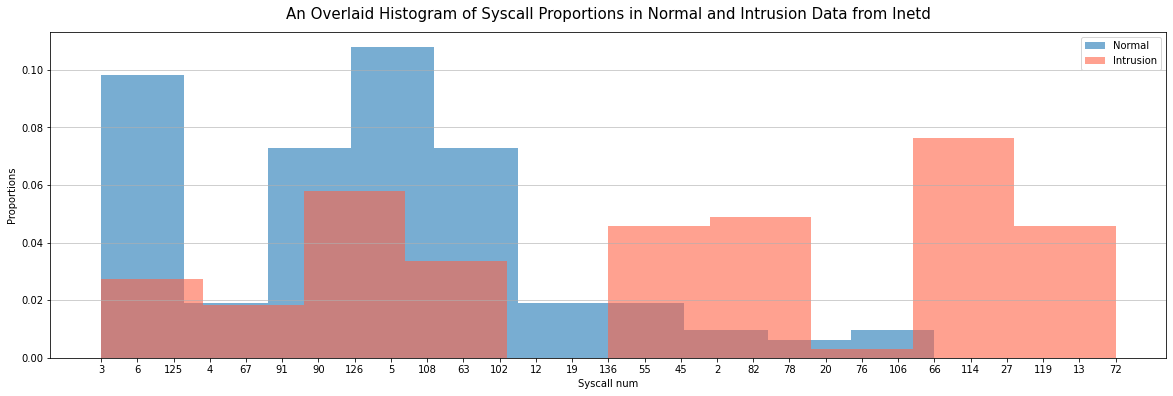

In [11]:
# After Cleaning
plt.figure(figsize=(20,6))
plt.hist(normal[0], label='Normal', alpha=0.6, density=True)
plt.hist(intrusion[0], label='Intrusion', color='tomato', alpha=0.6, density=True)
plt.legend()
plt.ylabel('Proportions')
plt.xlabel('Syscall num')
plt.grid(axis='y', alpha=0.75)
#plt.xticks(np.arange(0,200,10))
plt.title('An Overlaid Histogram of Syscall Proportions in Normal and Intrusion Data from ' + DATA,y=1.02, fontsize=15)
plt.show()

**Labeling Sequences**

In [12]:
# Intrusion sequences is labeled 1. Rename columns of the dataframe
intrusion['Label'] = 1
#intrusion.rename(columns={0: 'Position1', 1: 'Position2', 2: 'Position3', 3: 'Position4',
#                          4: 'Position5', 5: 'Position6'}, inplace=True)

print(intrusion.head(5), '\n')

     0    1    2    3    4    5    6  ...    9   10   11   12   13  14 Label
0  126    2  126    6   82   55  102  ...    2   55  102   55  126   2     1
1  126    6   82   55  102   55  126  ...    6   82  114  114  119  55     1
2  114  114  114  114  114  119   27  ...  102  102  102  119  126  67     1
3  126    6   82   55  102   55  126  ...  102   55  126    2  126   6     1
4   55  102   55  126    2  126    6  ...  114  119  126   67   13  27     1

[5 rows x 16 columns] 



In [13]:
# Normal sequences is labeled 0. Rename columns of the dataframe
normal['Label'] = 0
#normal.rename(columns={0: 'Position1', 1: 'Position2', 2: 'Position3', 3: 'Position4',
#                        4: 'Position5', 5: 'Position6'}, inplace=True)
print(normal.head(5), '\n')

print('Normal len:',len(normal),'\nIntrusion len:', len(intrusion))

     0    1   2   3    4    5    6  ...    9   10   11   12   13  14 Label
0    3   19   6  91  102  102  102  ...  126  126    5  108   90   3     0
1    6    5   3  90   90   90   90  ...   91  125  125  125  136  49     0
2    6   63  63   6    6    6    6  ...    6    6    6    6    6   6     0
3  125  136  49  24   47   50   45  ...  106  106  106  106  106   2     0
4    4    6  91  76    5  108   90  ...  126    5   45  108   90   3     0

[5 rows x 16 columns] 

Normal len: 137 
Intrusion len: 117


## **Partition Training and Testing dataset 70/30**

If there is not enough data from either class, bootstrap to generate more data and create a balanced sample

In [14]:
df.iloc[:, :-1]

,PID
0,167
1,167
2,167
3,167
4,167
...,...
536,2669
537,2669
538,2669
539,2669


In [15]:
# combine normal and intrusion data and split them into training and testing sets
df = normal.append(intrusion, ignore_index=True).astype(int)
print('Df sz:', df.shape)

# Spliting into training and testing
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['Label'], test_size = 0.30, shuffle=True)

# Reset index of training and testing sets
x_train.reset_index(drop=True, inplace=True); y_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True);  y_test.reset_index(drop=True, inplace=True)

print('Train sz:',len(x_train), len(y_train))
intrusion_train = y_train.loc[y_train == 1]
normal_train = y_train.loc[y_train == 0]
print('Train set: Intrusion vs. Normal cases', len(y_train.iloc[intrusion_train] ), len(y_train.iloc[normal_train] ))

print('Test sz:', len(x_test), len(y_test))
intrusion_test = y_test.loc[y_test == 1]
normal_test = y_test.loc[y_test == 0]
print('Test set: Intrusion vs. Normal cases', len(y_test.iloc[intrusion_test] ), len(y_test.iloc[normal_test] ))

Df sz: (254, 16)
Train sz: 177 177
Train set: Intrusion vs. Normal cases 78 99
Test sz: 77 77
Test set: Intrusion vs. Normal cases 39 38


In [16]:
# Bootstrap training data
## Lived-name has more intrusion cases than normal cases (189 > 71) --> bootstrap normal cases only
x_train['Label'] = y_train
if len(intrusion_train) > len(normal_train):
  x_train = x_train.iloc[intrusion_train.index].append(x_train.iloc[normal_train.index].sample(n = len(intrusion_train), replace=True), ignore_index=True) #upsampled normal data and add to train set
else:
  x_train = x_train.iloc[normal_train.index].append(x_train.iloc[intrusion_train.index].sample(n = len(normal_train), replace=True), ignore_index=True) #upsampled intrusion data and add to train set

#x_train = x_train.append(x_train.sample(frac=1), ignore_index=True) # Bootstrap training data in case there is not enough data
x_train = x_train.sample(frac=1) # Shuffle data
x_train.reset_index(drop=True, inplace=True)
y_train = x_train['Label']
x_train.drop(columns='Label', inplace=True)
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,6,63,63,6,6,6,6,6,6,6,6,6,6,6,6
1,126,126,5,45,108,90,3,3,6,91,5,108,90,3,19
2,2,126,6,82,55,102,55,126,2,126,6,82,114,114,119
3,55,102,55,126,2,126,6,82,114,114,119,55,102,55,126
4,126,5,45,108,90,3,19,6,91,63,6,63,63,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,90,6,5,3,90,90,90,90,6,125,91,125,125,125,136
194,114,114,114,114,114,114,114,114,114,114,114,114,119,27,82
195,126,82,55,102,55,126,2,126,6,82,114,114,119,126,67
196,63,63,6,6,6,6,6,6,6,6,6,6,6,6,6


In [17]:
y_train

0      0
1      0
2      1
3      1
4      0
      ..
193    0
194    1
195    1
196    0
197    0
Name: Label, Length: 198, dtype: int64


# **Performance Measures**


1.   Function calc_false_positive: Calculates FPR
2.   Function print_performance: Formats printing performance metrics and ROC curve for each model
3.   Function color_confusion_matrix: prints out a heatmap of confusion matrix in blue color scale






In [18]:
# This function calculate False Positive Rate given a confusion matrix
def calc_false_positive (cmatrix):
  specificity = cmatrix[0,0]/(cmatrix[0,0] + cmatrix[0,1])
  return 1-specificity

# This function prints performance metrics and ROC curve given the model name, true labels and predicted labels
def print_performance( model_name, true_labels, pred_labels):
  # rows are actual, columns are predicted
  cmatrix = confusion_matrix(true_labels, pred_labels)
  fpr = calc_false_positive(cmatrix)

  print('Confusion Matrix: \n',cmatrix)
  print('\nTesting Accuracy: %.2f'% metrics.accuracy_score(true_labels, pred_labels))
  print('Precision:%.2f'%  metrics.precision_score(true_labels, pred_labels))
  print('Recall: %.2f'% metrics.recall_score(true_labels, pred_labels))
  print('False Positive Rate: %.2f'% fpr)
  print('\nClassification report:', classification_report(true_labels, pred_labels), sep='\n')
  print('AUC: %.2f'% roc_auc_score(true_labels, pred_labels))

  false_positive_rate, recall, thresholds = roc_curve(true_labels, pred_labels)
  roc_auc = auc(false_positive_rate, recall)
  plt.figure()
  plt.title( model_name+' ROC Curve on ' + DATA)
  plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.2f' %roc_auc)
  plt.legend(loc='lower right')
  plt.plot([0,1], [0,1], 'r--')
  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.1])
  plt.ylabel('Recall')
  plt.xlabel('False Positive Rate (1-Specificity)')
  #plt.savefig(model_name+'-ROC.jpg')
  plt.show()

# Plot a heatmap of confusion matrix given the model name, a classifier model, testing data and the predicted label
def color_confusion_matrix( model_name, model, x_test, y_test, y_predicted):
  class_names = ['Normal', 'Intrusion']

  fig, ax = plt.subplots(figsize=(6, 6))
  plot_confusion_matrix(model, x_test, y_test, display_labels=class_names, 
                        values_format='d', ax = ax, cmap=plt.cm.Blues)
  plt.title('Confusion Matrix of ' + str(model_name))
  #plt.savefig(model_name+'-CM.jpg')
  plt.show()

  cmatrix = confusion_matrix(y_test, y_predicted)
  print(cmatrix)

# **K-means**

Confusion Matrix: 
 [[12 26]
 [19 20]]

Testing Accuracy: 0.42
Precision:0.43
Recall: 0.51
False Positive Rate: 0.68

Classification report:
              precision    recall  f1-score   support

           0       0.39      0.32      0.35        38
           1       0.43      0.51      0.47        39

    accuracy                           0.42        77
   macro avg       0.41      0.41      0.41        77
weighted avg       0.41      0.42      0.41        77

AUC: 0.41


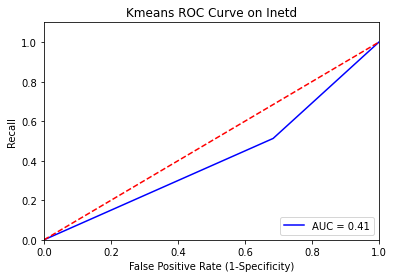

Number of iterations before converging: 7
Train AUC: 0.364 vs Test AUC: 0.414


In [19]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score

# Choose K cluster = 2
kmeans = KMeans(n_clusters=2)
# Fit Kmeans to the training set
kmeans.fit(x_train)


# Recording TPR and FPR to plot TRAINING ROC curves
y_pred = kmeans.predict(x_train)
KM_train = {}
KM_train['fpr'], KM_train['tpr'], thresh = roc_curve(y_train, y_pred)
KM_train['auc'] = roc_auc_score(y_train, y_pred)

## TESTING K-MEANS
y_predicted = kmeans.predict(x_test)

print_performance('Kmeans',y_test, y_predicted)

# Number of iterations before converging
print('Number of iterations before converging:', kmeans.n_iter_)


# Recording TPR and FPR for the TESTING ROC curves
KM_test = {}
KM_test['fpr'], KM_test['tpr'], thresh = roc_curve(y_test, y_predicted)
KM_test['auc'] = roc_auc_score(y_test, y_predicted)


print('Train AUC: %.3f vs Test AUC: %.3f' %(KM_train['auc'], KM_test['auc']))

# **Logistic Regression**

Confusion Matrix: 
 [[24 14]
 [20 19]]

Testing Accuracy: 0.56
Precision:0.58
Recall: 0.49
False Positive Rate: 0.37

Classification report:
              precision    recall  f1-score   support

           0       0.55      0.63      0.59        38
           1       0.58      0.49      0.53        39

    accuracy                           0.56        77
   macro avg       0.56      0.56      0.56        77
weighted avg       0.56      0.56      0.56        77

AUC: 0.56


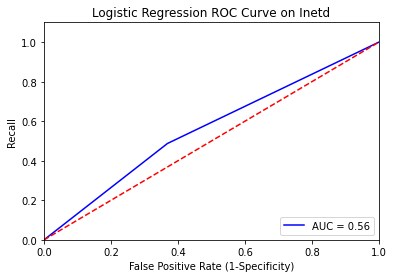

Train AUC: 0.616 vs Test AUC: 0.559


In [20]:
from sklearn.linear_model import LogisticRegression

# Fit the model on the training set
lgModel = LogisticRegression().fit(x_train, y_train)
y_pred = lgModel.predict(x_train)

# Recording TPR and FPR for the TESTING ROC curves
LR_train = {}
LR_train['fpr'], LR_train['tpr'], thresh = roc_curve(y_train, y_pred)
LR_train['auc'] = roc_auc_score(y_train, y_pred)


## TESTING Logistic Regression
y_predicted = lgModel.predict(x_test)

# Evaluating Performance on Testing data
print_performance('Logistic Regression', y_test, y_predicted)

# Recording TPR and FPR for the multi-ROC curves
LR_test = {}
LR_test['fpr'], LR_test['tpr'], thresh = roc_curve(y_test, y_predicted)
LR_test['auc'] = roc_auc_score(y_test, y_predicted)

print('Train AUC: %.3f vs Test AUC: %.3f' %(LR_train['auc'], LR_test['auc']))

# **SVM**

This model uses a Polynomial kernel, and the rest of the parameters are as default







****Polynomial kernel model: 
Confusion Matrix: 
 [[38  0]
 [16 23]]

Testing Accuracy: 0.79
Precision:1.00
Recall: 0.59
False Positive Rate: 0.00

Classification report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.83        38
           1       1.00      0.59      0.74        39

    accuracy                           0.79        77
   macro avg       0.85      0.79      0.78        77
weighted avg       0.85      0.79      0.78        77

AUC: 0.79


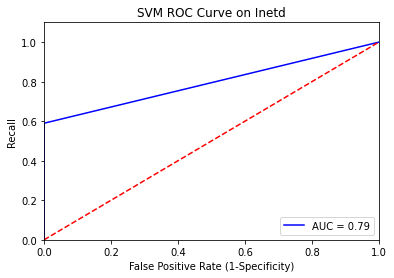

Train AUC: 1.000 vs Test AUC: 0.795


In [21]:
from sklearn import svm

#### Create a SVM classifier using polynomial Kernel
print('\n****Polynomial kernel model: ')
svm_model = svm.SVC(kernel = 'poly')

#Train the  & Get accuracy from training
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_train)

# Recording TPR and FPR for plotting TRAINING ROC curves
SVM_train = {}
SVM_train['fpr'], SVM_train['tpr'], thresh = roc_curve(y_train, y_pred)
SVM_train['auc'] = roc_auc_score(y_train, y_pred)


# Test the model w testing data
y_predicted = svm_model.predict(x_test)

# Evaluate the model 
print_performance('SVM', y_test, y_predicted)

# Recording TPR and FPR for TESTING-ROC curves
SVM_test = {}
SVM_test['fpr'], SVM_test['tpr'], thresh = roc_curve(y_test, y_predicted)
SVM_test['auc'] = roc_auc_score(y_test, y_predicted)

print('Train AUC: %.3f vs Test AUC: %.3f' %(SVM_train['auc'], SVM_test['auc']))

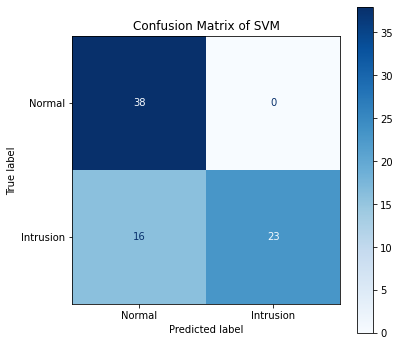

[[38  0]
 [16 23]]


In [22]:
# Plot a heatmap confusion matrix
color_confusion_matrix('SVM', svm_model, x_test, y_test, y_predicted)

# **Neural Net**

This model contains 3 layers: input layer of 6 nodes, a fully connected layer of 6 nodes and an output layer of 2 nodes

In [23]:
# Scale syscall number to between 0 and 1
# The maximum syscall number in UNM data is 181
max_syscall = 181
x_train_nn = x_train/max_syscall
x_test_nn = x_test/max_syscall

In [24]:
import tensorflow as tf
from tensorflow import keras
INPUT_SZ = len(x_train.columns)
nn_model = keras.Sequential([
    keras.layers.Input(shape = (INPUT_SZ,)),           # model expect input to be a vector of 6 numbers
    keras.layers.Dense(INPUT_SZ, activation = 'relu'), 
    keras.layers.Dense(2, activation = 'sigmoid')
])

nn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model to training set
history = nn_model.fit(x_train_nn, y_train, epochs=10, batch_size=16, verbose=1)  

Epoch 1/10
13/13 [==============================] - 3s 3ms/step - loss: 0.7076 - accuracy: 0.5303
Epoch 2/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.5404
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.5404
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6773 - accuracy: 0.5152
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.5354
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6714 - accuracy: 0.5455
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.5556
Epoch 8/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6663 - accuracy: 0.5606
Epoch 9/10
13/13 [==============================] - 0s 4ms/step - loss: 0.6640 - accuracy: 0.5556
Epoch 10/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6613 - accuracy: 0.5707


In [25]:
# Get predicted Training labels
y_pred = np.argmax(nn_model.predict(x_train_nn), axis=-1)

# Recording TPR and FPR for the TRAINING ROC curves
NN_train = {}
NN_train['fpr'], NN_train['tpr'], thresh = roc_curve(y_train, y_pred)
NN_train['auc'] = roc_auc_score(y_train, y_pred)
#print_performance(y_train, y_predicted)

3/3 [==============================] - 0s 5ms/step - loss: 0.7115 - accuracy: 0.4416
Test accuracy: 0.44155845046043396  Test loss: 0.7115010619163513
Confusion Matrix: 
 [[11 27]
 [16 23]]

Testing Accuracy: 0.44
Precision:0.46
Recall: 0.59
False Positive Rate: 0.71

Classification report:
              precision    recall  f1-score   support

           0       0.41      0.29      0.34        38
           1       0.46      0.59      0.52        39

    accuracy                           0.44        77
   macro avg       0.43      0.44      0.43        77
weighted avg       0.43      0.44      0.43        77

AUC: 0.44


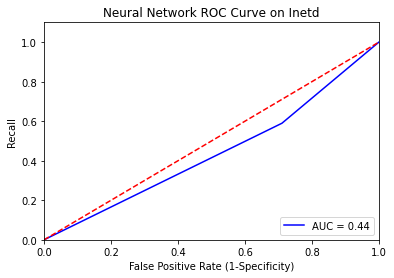

Train AUC: 0.576 vs Test AUC: 0.440


In [26]:
# Get the loss and accuracy on testing set
test_loss, test_acc = nn_model.evaluate(x_test_nn,  y_test, verbose=1) 
y_predicted = np.argmax(nn_model.predict(x_test_nn), axis=-1)


print('Test accuracy:', test_acc,' Test loss:', test_loss)
print_performance('Neural Network', y_test, y_predicted)

# Recording TPR and FPR for the TESTING-ROC curves
NN_test = {}
NN_test['fpr'], NN_test['tpr'], thresh = roc_curve(y_test, y_predicted)
NN_test['auc'] = roc_auc_score(y_test, y_predicted)

print('Train AUC: %.3f vs Test AUC: %.3f' %(NN_train['auc'], NN_test['auc']))

In [27]:
nn_model.summary()

#history.history

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 32        
Total params: 272
Trainable params: 272
Non-trainable params: 0
_________________________________________________________________


# **Decision Tree**

This model uses GINI criterion to split the data and requires at least 10 observations to split and 5 observations in the leaf.

Confusion Matrix: 
 [[32  6]
 [19 20]]

Testing Accuracy: 0.68
Precision:0.77
Recall: 0.51
False Positive Rate: 0.16

Classification report:
              precision    recall  f1-score   support

           0       0.63      0.84      0.72        38
           1       0.77      0.51      0.62        39

    accuracy                           0.68        77
   macro avg       0.70      0.68      0.67        77
weighted avg       0.70      0.68      0.67        77

AUC: 0.68


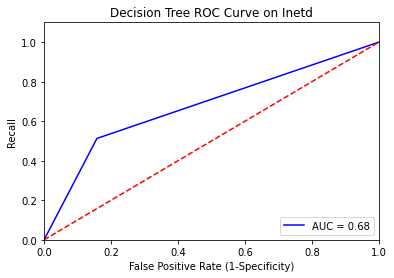

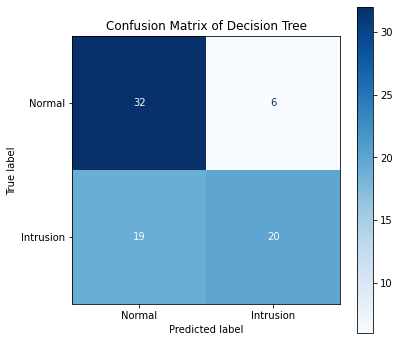

[[32  6]
 [19 20]]
Train AUC: 0.884 vs Test AUC: 0.677


In [28]:
from sklearn.tree import DecisionTreeClassifier

# Create and Train DecTree model
decTree = DecisionTreeClassifier(criterion='gini', min_samples_split=10,min_samples_leaf=5,max_features='auto')
decTree = decTree.fit(x_train, y_train)

# Recording TPR and FPR for the TRAINING ROC curves
y_pred = decTree.predict(x_train)
DT_train = {}
DT_train['fpr'], DT_train['tpr'], thresh = roc_curve(y_train, y_pred)
DT_train['auc'] = roc_auc_score(y_train, y_pred)

# Predict testing data
y_predicted = decTree.predict(x_test)

# Print performance measures
print_performance('Decision Tree', y_test, y_predicted)

# Color Confusion Matrix
color_confusion_matrix('Decision Tree', decTree, x_test, y_test, y_predicted)

# Recording TPR and FPR for TESTING-ROC curves
DT_test = {}
DT_test['fpr'], DT_test['tpr'], thresh = roc_curve(y_test, y_predicted)
DT_test['auc'] = roc_auc_score(y_test, y_predicted)

print('Train AUC: %.3f vs Test AUC: %.3f' %(DT_train['auc'], DT_test['auc']))

# **Random Forest**

This model has no max depth and allows bootstrapping observations during training. It uses GINI criterion to split and requires a minimum of 10 observations to split and the leaf node must have above 5 observations.


Confusion Matrix: 
 [[35  3]
 [14 25]]

Testing Accuracy: 0.78
Precision:0.89
Recall: 0.64
False Positive Rate: 0.08

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        38
           1       0.89      0.64      0.75        39

    accuracy                           0.78        77
   macro avg       0.80      0.78      0.78        77
weighted avg       0.80      0.78      0.78        77

AUC: 0.78


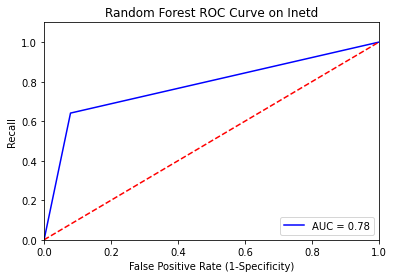

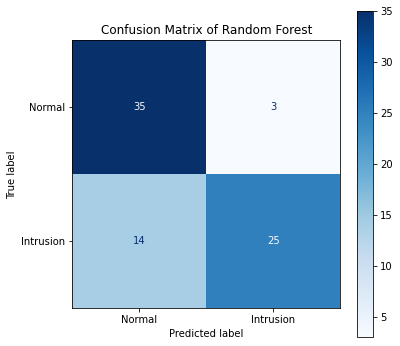

[[35  3]
 [14 25]]
Train AUC: 0.970 vs Test AUC: 0.781


In [29]:
from sklearn.ensemble import RandomForestClassifier

# Build model
randomForest = RandomForestClassifier(max_depth=None, min_samples_split=10, min_samples_leaf=5, 
                                      max_features='auto', bootstrap=True,verbose=0, criterion='gini')
# Train the model with training set
randomForest.fit(x_train, y_train)

# Recording TPR and FPR for the TRAINING ROC curves
y_pred = randomForest.predict(x_train)
RF_train = {}
RF_train['fpr'], RF_train['tpr'], thresh = roc_curve(y_train, y_pred)
RF_train['auc'] = roc_auc_score(y_train, y_pred)

# Predict the labels for testing set
y_predicted = randomForest.predict(x_test)

# Print performance measures
print_performance('Random Forest', y_test, y_predicted)

# Color Confusion Matrix
color_confusion_matrix('Random Forest', randomForest, x_test, y_test, y_predicted)

# Recording TPR and FPR for the multi-ROC curves
RF_test = {}
RF_test['fpr'], RF_test['tpr'], thresh = roc_curve(y_test, y_predicted)
RF_test['auc'] = roc_auc_score(y_test, y_predicted)

print('Train AUC: %.3f vs Test AUC: %.3f' %(RF_train['auc'], RF_test['auc']))

# **KNN**

This model classifies each observation based on 3 nearest neighbors with uniform weight.

Confusion Matrix: 
 [[29  9]
 [ 8 31]]

Testing Accuracy: 0.78
Precision:0.78
Recall: 0.79
False Positive Rate: 0.24

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        38
           1       0.78      0.79      0.78        39

    accuracy                           0.78        77
   macro avg       0.78      0.78      0.78        77
weighted avg       0.78      0.78      0.78        77

AUC: 0.78


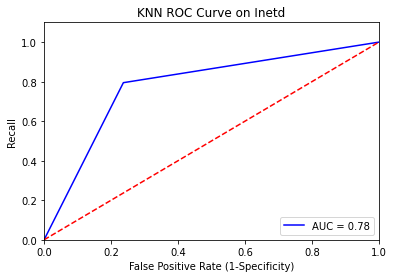

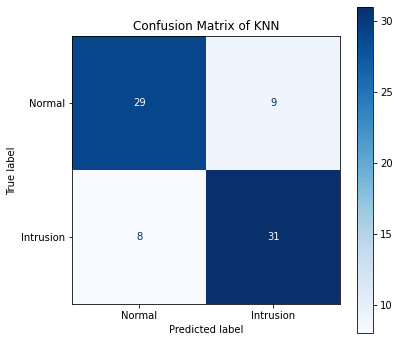

[[29  9]
 [ 8 31]]
Train AUC: 0.894 vs Test AUC: 0.779


In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Creat and Train KNN model
KNN = KNeighborsClassifier(n_neighbors=3, weights='uniform')
KNN.fit(x_train, y_train)

# Recording TPR and FPR for the TRAINING ROC curves
y_pred = KNN.predict(x_train)
KNN_train = {}
KNN_train['fpr'], KNN_train['tpr'], thresh = roc_curve(y_train, y_pred)
KNN_train['auc'] = roc_auc_score(y_train, y_pred)

# Predict testing data
y_predicted = KNN.predict(x_test)

# Print performance measures
print_performance('KNN', y_test, y_predicted)

# Color Confusion Matrix
color_confusion_matrix('KNN', KNN, x_test, y_test, y_predicted)

# Recording TPR and FPR for TESTING-ROC curves
KNN_test = {}
KNN_test['fpr'], KNN_test['tpr'], thresh = roc_curve(y_test, y_predicted)
KNN_test['auc'] = roc_auc_score(y_test, y_predicted)

print('Train AUC: %.3f vs Test AUC: %.3f' %(KNN_train['auc'], KNN_test['auc']))

# **Naive Bayes**

Confusion Matrix: 
 [[26 12]
 [20 19]]

Testing Accuracy: 0.58
Precision:0.61
Recall: 0.49
False Positive Rate: 0.32

Classification report:
              precision    recall  f1-score   support

           0       0.57      0.68      0.62        38
           1       0.61      0.49      0.54        39

    accuracy                           0.58        77
   macro avg       0.59      0.59      0.58        77
weighted avg       0.59      0.58      0.58        77

AUC: 0.59


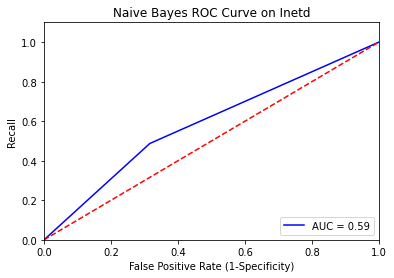

Train AUC: 0.641 vs Test AUC: 0.586


In [31]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier and train with training set
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train, y_train)

# Recording TPR and FPR for the TRAINING ROC curves
y_pred = NaiveBayes.predict(x_train)
NB_train = {}
NB_train['fpr'], NB_train['tpr'], thresh = roc_curve(y_train, y_pred)
NB_train['auc'] = roc_auc_score(y_train, y_pred)

# Predict testing data
y_predicted = NaiveBayes.predict(x_test)

# Print performance measures
print_performance('Naive Bayes', y_test, y_predicted)

# Recording TPR and FPR for the TESTING-ROC curves
NB_test = {}
NB_test['fpr'], NB_test['tpr'], thresh = roc_curve(y_test, y_predicted)
NB_test['auc'] = roc_auc_score(y_test, y_predicted)

print('Train AUC: %.3f vs Test AUC: %.3f' %(NB_train['auc'], NB_test['auc']))

# **Graphing multi-ROC Curves**

In [32]:
# Graphing overlaid ROC curves, where each one represents a model AUC score
def graph_multi_ROC ():
  # Set color for each model
  colors = {'KM': 'lightcoral','LR': 'darkorange', 'SVM':'lime', 'NB': 'steelblue',
            'NN': 'purple','DT': 'magenta','RF': 'deeppink','KNN': 'darkturquoise',
            'BERT': 'darkred', 'GPT': 'blue'}
  # Set marker for each model          
  markers = {'KM':'1--','LR': 'v--', 'SVM': '^--', 'NN': '*--', 'DT': 'o--', 'RF': '+--', 'KNN': '.--', 'NB': 'x--', 'BERT':'<--', 'GPT': '>--'}
  
  plt.figure(figsize=(9,6))

  plt.plot(KM_test.get('fpr'), KM_test.get('tpr'), markers.get('KM'), color=colors.get('KM'),  label="KM - AUC=" + str(KM_test.get('auc').round(3)))
  plt.plot(LR_test.get('fpr'), LR_test.get('tpr'), markers.get('LR'), color=colors.get('LR'),  label="LR - AUC=" + str(LR_test.get('auc').round(3)))
  plt.plot(SVM_test.get('fpr'),SVM_test.get('tpr'),markers.get('SVM'),color=colors.get('SVM'), label="SVM - AUC="+ str(SVM_test.get('auc').round(3)))
  plt.plot(NN_test.get('fpr'), NN_test.get('tpr'), markers.get('NN'), color=colors.get('NN'),  label="NN - AUC=" + str(NN_test.get('auc').round(3)))
  plt.plot(DT_test.get('fpr'), DT_test.get('tpr'), markers.get('DT'), color=colors.get('DT'),  label="DT - AUC=" + str(DT_test.get('auc').round(3)))
  plt.plot(RF_test.get('fpr'), RF_test.get('tpr'), markers.get('RF'), color=colors.get('RF'),  label="RF - AUC=" + str(RF_test.get('auc').round(3)))
  plt.plot(KNN_test.get('fpr'),KNN_test.get('tpr'),markers.get('KNN'),color=colors.get('KNN'), label="KNN - AUC="+ str(KNN_test.get('auc').round(3)))
  plt.plot(NB_test.get('fpr'), NB_test.get('tpr'), markers.get('NB'), color=colors.get('NB'),  label="NB - AUC=" + str(NB_test.get('auc').round(3)))
  plt.plot(BERT_test.get('fpr'),BERT_test.get('tpr'), markers.get('BERT'), color=colors.get('BERT'),  label="BERT - AUC="+ str(BERT_test.get('auc').round(3)))
  plt.plot(GPT_test.get('fpr'),GPT_test.get('tpr'), markers.get('GPT'), color=colors.get('GPT'),  label="GPT-2 - AUC="+ str(GPT_test.get('auc').round(3)))

  plt.plot([0,1], [0,1], 'k--', label='Random Chances')
  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.02])
  plt.ylabel('Recall')
  plt.xlabel('False Positive Rate (1-Specificity)')
  plt.legend(loc='lower right') 
  plt.title( 'Testing ROCs on ' + DATA)
  #plt.savefig(DATA_I+'-'+train_or_test+'.jpg', dpi = 80)
  plt.show()

# **BERT**


In [33]:
!pip install pytorch_pretrained_bert pytorch-nlp

     |████████████████████████████████| 123 kB 5.4 MB/s 
     |████████████████████████████████| 90 kB 6.6 MB/s 
     |████████████████████████████████| 131 kB 30.9 MB/s 
     |████████████████████████████████| 79 kB 8.0 MB/s 
     |████████████████████████████████| 8.0 MB 35.8 MB/s 
     |████████████████████████████████| 138 kB 42.6 MB/s 
     |████████████████████████████████| 127 kB 45.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [34]:
from pytorch_pretrained_bert import BertModel
from torch import nn
from pytorch_pretrained_bert import BertTokenizer
from keras.preprocessing.sequence import pad_sequences
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import Adam
from torch.nn.utils import clip_grad_norm_
from IPython.display import clear_output

**Prepare for Train and test data for BERT**

In [35]:
train_texts = []
for i in range(x_train.shape[0]):
     train_texts.append(" ".join(np.array(x_train.iloc[i,:]).astype(str)))
train_texts = tuple(train_texts) 

test_texts = []
for i in range(x_test.shape[0]):
     test_texts.append(" ".join(np.array(x_test.iloc[i,:]).astype(str)))
test_texts = tuple(test_texts) 

train_labels = tuple(y_train.tolist())
test_labels = tuple(y_test.tolist())

len(train_texts), len(train_labels), len(test_texts), len(test_labels)

(198, 198, 77, 77)

In [36]:
# Tokenizer 
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Example
tokenizer.tokenize(train_texts[8])

100%|██████████| 231508/231508 [00:00<00:00, 1997200.53B/s]


['108',
 '90',
 '3',
 '19',
 '6',
 '91',
 '102',
 '102',
 '102',
 '102',
 '3',
 '6',
 '91',
 '126',
 '126']

In [37]:
# Convert to tokens using tokenizer
train_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:20] + ['[SEP]'], train_texts))
test_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:20] + ['[SEP]'], test_texts))

print('Number of Training Sequences:',len(train_tokens), '\nNumber of Testing Sequences:', len(test_tokens) )       

Number of Training Sequences: 198 
Number of Testing Sequences: 77


In [38]:
# Following is to convert List of words to list of numbers. (Words are replaced by their index in dictionar)
train_tokens_ids = pad_sequences(list(map(tokenizer.convert_tokens_to_ids, train_tokens)), maxlen=20, truncating="post", padding="post", dtype="int")
test_tokens_ids = pad_sequences(list(map(tokenizer.convert_tokens_to_ids, test_tokens)), maxlen=20, truncating="post", padding="post", dtype="int")

train_tokens_ids.shape, test_tokens_ids.shape

((198, 20), (77, 20))

In [39]:
# Prepare labels
# True if intrusion or False if normal
train_y = np.array(train_labels) == 1
test_y = np.array(test_labels) == 1
train_y.shape, test_y.shape, np.mean(train_y), np.mean(test_y)

((198,), (77,), 0.5, 0.5064935064935064)

In [40]:
# To mask the paddings
train_masks = [[float(i > 0) for i in ii] for ii in train_tokens_ids]
test_masks = [[float(i > 0) for i in ii] for ii in test_tokens_ids]

In [41]:
# Define BERT model
class BertBinaryClassifier(nn.Module):
    def __init__(self, dropout=0.1):
        super(BertBinaryClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, tokens, masks=None):
        # First Layer
        _, pooled_output = self.bert(tokens, attention_mask=masks, output_all_encoded_layers=False)

        dropout_output = self.dropout(pooled_output)

        linear_output = self.linear(dropout_output)
        
        # output layer
        proba = self.sigmoid(linear_output)
        
        return proba
      
    def train_m(self,x,y,train_mask,epochs,batchsize):
      train_tokens_tensor = torch.tensor(x)
      train_y_tensor = torch.tensor(y.reshape(-1, 1)).float()
      train_masks_tensor = torch.tensor(train_mask)

      train_dataset = TensorDataset(train_tokens_tensor, train_masks_tensor, train_y_tensor)
      train_sampler = RandomSampler(train_dataset)
      train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=batchsize) 


      param_optimizer = list(self.sigmoid.named_parameters()) 
      optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]
      optimizer = Adam(self.bert.parameters(), lr=2e-5)
      for epoch_num in range(epochs):
          self.train() # Training Flag
          train_loss = 0
          for step_num, batch_data in enumerate(train_dataloader):
              
              # Load batch on device memory
              token_ids, masks, labels = tuple(t.to(device) for t in batch_data)

              # Get the output of the model for provided input
              logits = self(token_ids, masks)
              
              # Loss function
              loss_func = nn.BCELoss()

              # Calculate Loss
              batch_loss = loss_func(logits, labels)
              train_loss += batch_loss.item()
              
              # backpropagate the error
              self.zero_grad()
              batch_loss.backward()
              
              # Update the Weights of the Model
              clip_grad_norm_(parameters=self.parameters(), max_norm=1.0)
              optimizer.step()
              
              clear_output(wait=True)
              print('Epoch: ', epoch_num + 1)
              print("\r" + "{0}/{1} loss: {2} ".format(step_num, len(train_labels) / batchsize, train_loss / (step_num + 1)))        

In [42]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [43]:
bert_clf = BertBinaryClassifier()
bert_clf = bert_clf.cuda()

100%|██████████| 407873900/407873900 [00:11<00:00, 34707639.76B/s]


**Fine Tune BERT**

In [44]:
# Train BERT NLP
bert_clf.train_m(train_tokens_ids,train_y,train_masks,8,16)

Epoch:  8
12/12.375 loss: 0.02647502437377205 


**Evaluate on Testing Set**

In [45]:
# Convert token ids to tensor 
test_tokens_tensor = torch.tensor(test_tokens_ids)

# Convert labels to tensors
test_y_tensor = torch.tensor(test_y.reshape(-1, 1)).float()

# Convert to tensro for maks
test_masks_tensor = torch.tensor(test_masks)


# Load Token, token mask and label into Dataloader
test_dataset = TensorDataset(test_tokens_tensor, test_masks_tensor, test_y_tensor)

# Define sampler
test_sampler = SequentialSampler(test_dataset)

# Defile test data loader
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=16)

In [46]:
bert_clf.eval() # Define eval
bert_predicted = [] # To Store predicted result
all_logits = [] # Actual output that is between 0 to 1 is stored here

with torch.no_grad():
    for step_num, batch_data in enumerate(test_dataloader):

        # Load the batch on gpu memory
        token_ids, masks, labels = tuple(t.to(device) for t in batch_data)

        # Calculate ouput of bert
        logits = bert_clf(token_ids, masks)

        # Get the numpy logits
        numpy_logits = logits.cpu().detach().numpy()  # Detach from the GPU memory
        
        # Using the threshold find binary 
        bert_predicted += list(numpy_logits[:, 0] > 0.5)  # Threshold conversion
        all_logits += list(numpy_logits[:, 0])

Confusion Matrix: 
 [[38  0]
 [ 4 35]]

Testing Accuracy: 0.95
Precision:1.00
Recall: 0.90
False Positive Rate: 0.00

Classification report:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95        38
        True       1.00      0.90      0.95        39

    accuracy                           0.95        77
   macro avg       0.95      0.95      0.95        77
weighted avg       0.95      0.95      0.95        77

AUC: 0.95


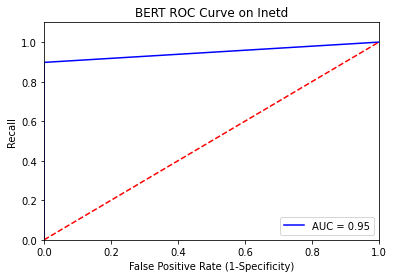

In [47]:
print_performance('BERT',test_y, bert_predicted)

# Recording TPR and FPR for the TESTING-ROC curves
BERT_test = {}
BERT_test['fpr'], BERT_test['tpr'], thresh = roc_curve(test_y, bert_predicted)
BERT_test['auc'] = roc_auc_score(test_y, bert_predicted)

# **GPT-2**

In [48]:
!pip install transformers

from transformers import GPT2Tokenizer, GPT2ForSequenceClassification

     |████████████████████████████████| 2.9 MB 5.4 MB/s 
     |████████████████████████████████| 895 kB 39.4 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 636 kB 31.9 MB/s 
     |████████████████████████████████| 3.3 MB 39.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [49]:
tokenizer = GPT2Tokenizer.from_pretrained('microsoft/DialoGPT-small')

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/641 [00:00<?, ?B/s]

In [50]:
# Padding sequences from the right to a max length of 20
tokenizer.padding_side = "right"
tokenizer.pad_token = tokenizer.eos_token
train_tokens = tokenizer(train_texts,return_tensors='pt',truncation=True,padding=True,max_length=20)
test_tokens = tokenizer(test_texts,return_tensors='pt',truncation=True,padding=True,max_length=20)

In [51]:
# Following is to convert List of words to list of numbers. (Words are replaced by their index in dictionar)

train_tokens_ids = train_tokens.input_ids
test_tokens_ids = test_tokens.input_ids

train_tokens_ids.shape, test_tokens_ids.shape

(torch.Size([198, 15]), torch.Size([77, 15]))

In [52]:
train_masks = train_tokens.attention_mask
test_masks = test_tokens.attention_mask

**Create GPT-2 Classifer**

In [53]:
class GTP2BinaryClassifier(nn.Module):
    def __init__(self, dropout=0.1):
        super(GTP2BinaryClassifier, self).__init__()
        self.gtp2 = GPT2ForSequenceClassification.from_pretrained('microsoft/DialoGPT-small')
      
    def train_m(self,x,y,train_mask,epochs,batchsize):
      train_tokens_tensor = torch.tensor(x)
      train_y_tensor = torch.tensor(y.reshape(-1, 1)).long()
      train_masks_tensor = torch.tensor(train_mask)

      train_dataset = TensorDataset(train_tokens_tensor, train_masks_tensor, train_y_tensor)
      train_sampler = RandomSampler(train_dataset)
      train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=batchsize) 


      # param_optimizer = list(self.gtp2.parameters()) 
      # optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]
      optimizer = Adam(self.gtp2.parameters(), lr=5e-5)
      for epoch_num in range(epochs):
          self.gtp2.train() # Training Flag
          train_loss = 0
          for step_num, batch_data in enumerate(train_dataloader):
              
              # Load batch on device memory
              token_ids, masks, labels = tuple(t.to(device) for t in batch_data)
              self.zero_grad()

              # Get the output of the model for provided input
              outputs = self.gtp2(token_ids,attention_mask=masks,labels=labels)
              loss, logits = outputs[:2]
              # logits = self(token_ids, masks)
              
              # Total Loss
              train_loss += loss.item()
              
              # Backward pass the loss
              loss.backward()
              torch.nn.utils.clip_grad_norm_(self.gtp2.parameters(), 1.0)
              
              optimizer.step()
              logits = logits.detach().cpu().numpy()

              clear_output(wait=True)
        
              print('Epoch: ', epoch_num + 1)
              print("\r" + "{0}/{1} loss: {2} ".format(step_num, len(train_labels) / batchsize, train_loss / (step_num + 1)))
        

In [54]:
gtp_clf = GTP2BinaryClassifier()
gtp_clf = gtp_clf.cuda()

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/DialoGPT-small were not used when initializing GPT2ForSequenceClassification: ['lm_head.weight']
- This IS expected if you are initializing GPT2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GPT2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at microsoft/DialoGPT-small and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [55]:
# Configure the Padding token id
gtp_clf.gtp2.config.pad_token_id = tokenizer.eos_token_id
gtp_clf.train_m(train_tokens_ids,train_y,train_masks,8,16)

Epoch:  8
12/12.375 loss: 0.05826191015568419 


**Evaluate on Testing Set**

In [56]:
test_tokens_tensor = torch.tensor(test_tokens_ids)
test_y_tensor = torch.tensor(test_y.reshape(-1, 1)).long()

test_masks_tensor = torch.tensor(test_masks)


test_dataset = TensorDataset(test_tokens_tensor, test_masks_tensor, test_y_tensor)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=16)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


In [57]:
# Evaluate Model
gtp_clf.eval() # Define eval
gpt_predicted = [] # Store Result
with torch.no_grad():
    for step_num, batch_data in enumerate(test_dataloader):

        token_ids, masks, labels = tuple(t.to(device) for t in batch_data)

        # ----------------------------------------------------------------
        outputs = gtp_clf.gtp2(token_ids,attention_mask=masks,labels=labels)
        loss, logits = outputs[:2]
        numpy_logits = logits.detach().cpu().numpy()
        # ----------------------------------------------------------------
        gpt_predicted +=list(numpy_logits.argmax(axis=-1).flatten().tolist())

Confusion Matrix: 
 [[33  5]
 [ 0 39]]

Testing Accuracy: 0.94
Precision:0.89
Recall: 1.00
False Positive Rate: 0.13

Classification report:
              precision    recall  f1-score   support

       False       1.00      0.87      0.93        38
        True       0.89      1.00      0.94        39

    accuracy                           0.94        77
   macro avg       0.94      0.93      0.93        77
weighted avg       0.94      0.94      0.93        77

AUC: 0.93


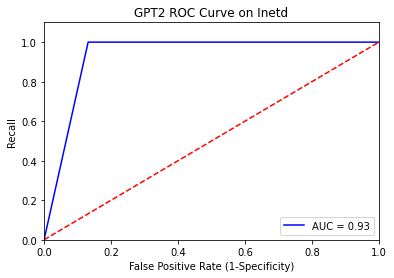

In [58]:
print_performance('GPT2',test_y, gpt_predicted)

# Recording TPR and FPR for the TESTING-ROC curves
GPT_test = {}
GPT_test['fpr'], GPT_test['tpr'], thresh = roc_curve(test_y, gpt_predicted)
GPT_test['auc'] = roc_auc_score(test_y, gpt_predicted) 

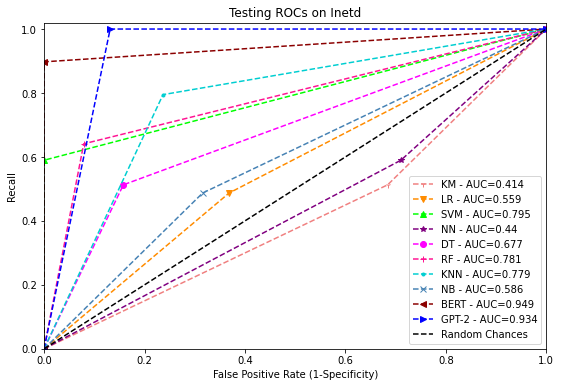

In [59]:
# Ploting the overlaid ROC curves on testing results:
graph_multi_ROC()

# **End**

## **Note**

BERT and GPT outperform the other algs.
In Live Lpr, original intrusion data have 164227 sequences, but only 202 of them are unique. Normal data has 92 unique records --> lack of data especially intrusion data. --> upsampled to get intrusion = normal and double the data by upsampling. ==? Result is improved a lot more

In MIT Live Lpr, when we bootstrap data to get normal = intrusion, BERT and GPT achieve 0.97 and 0.98, while the others only get 0.45 to 0.74 accuracy. When data from both classes are bootstraped to double the amount, BERT achieve 0.99 accuracy abd RF increase accuracy by 0.02, while the rest does not have any improvement.
